# random forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

df = pd.read_csv("../data/Heart.csv", index_col=0)
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


<Axes: xlabel='AHD', ylabel='count'>

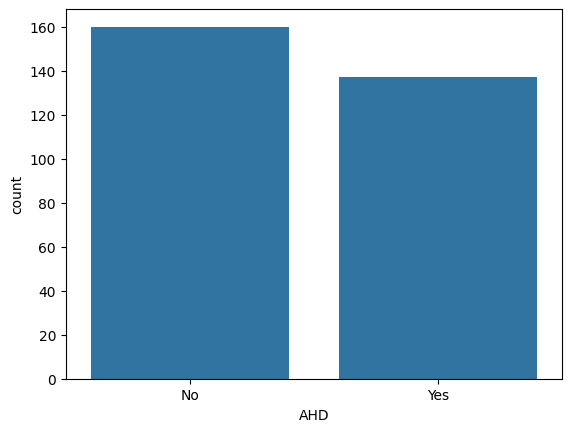

In [45]:
df.dropna(inplace=True)
sns.countplot(df, x="AHD")

In [46]:
df_dummies = pd.get_dummies(df, drop_first=True)
X,y = df_dummies.drop("AHD_Yes", axis=1), df_dummies["AHD_Yes"]

X_train,X_test,y_train, y_test =  train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((237, 16), (60, 16))

In [47]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train,y_train)

y_pred = model_rf.predict(X_test)
y_pred

array([False,  True, False,  True, False, False,  True,  True,  True,
       False, False, False, False,  True, False, False, False,  True,
        True, False,  True,  True,  True, False,  True, False,  True,
        True, False, False, False, False,  True, False, False, False,
        True, False,  True,  True, False,  True,  True,  True, False,
       False,  True,  True, False, False, False,  True, False, False,
        True,  True, False, False,  True,  True])

In [48]:
from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators": [100,150,200,300], "criterion":["gini","entropy"],"max_features":["auto", "sqrt", "log2"]}
clf =  GridSearchCV(RandomForestClassifier(), param_grid, cv=5, verbose=1, scoring="recall")
clf.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/Users/luddecmc/Desktop/SKOLARBETE-ITHS/repos/AI24-Machine-learning/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
40 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/luddecmc/Desktop/SKOLARBETE-ITHS/repos/AI24-Machine-learning/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luddecmc/Desktop/SKOLARBETE-ITHS/repos/AI24-Machine-learning/.venv/lib/python3.12/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  Fil

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 150, 200, 300]},
             scoring='recall', verbose=1)

In [49]:
clf.best_params_

{'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 150}

              precision    recall  f1-score   support

       False       0.91      0.81      0.85        36
        True       0.75      0.88      0.81        24

    accuracy                           0.83        60
   macro avg       0.83      0.84      0.83        60
weighted avg       0.84      0.83      0.83        60



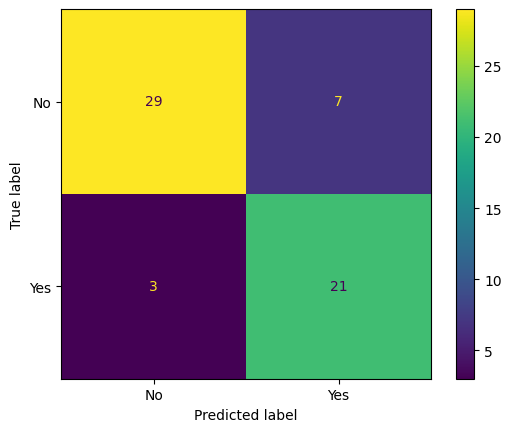

In [50]:
#eval

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

def evaluate_classification(y_test,y_pred,labels=["No","Yes"]):
    print(classification_report(y_test,y_pred))
    cm = confusion_matrix(y_test,y_pred)
    ConfusionMatrixDisplay(cm, display_labels=labels).plot()

evaluate_classification(y_test,y_pred)

              precision    recall  f1-score   support

       False       0.91      0.89      0.90        36
        True       0.84      0.88      0.86        24

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



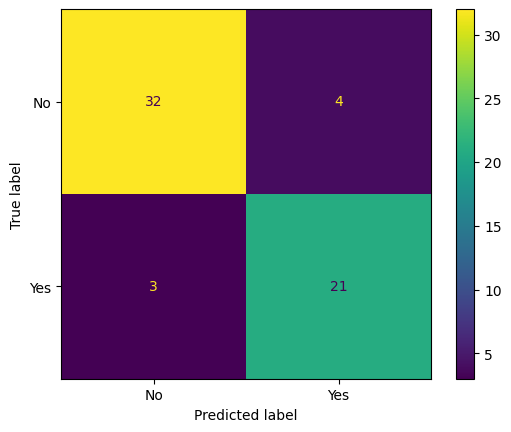

In [51]:
y_pred_tuned = clf.predict(X_test)
evaluate_classification(y_test,y_pred_tuned)

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import lin

vote_clf = VotingClassifier(
    [("rf", RandomForestClassifier()),
     ("svc", LinearSVC()),
     ("naive_complement", ComplementNB()),
     ("naive_bernoulli", BernoulliNB()),
     ("naive_multinomail", MultinomialNB())], voting="hard")

evaluate_model(vote_clf)